# Analisis Kategori Masalah dan Waktu Penyelesaian

================================================

Nama : Angga Fadhlurrahman Prianto

Objective : Analisis ini dibuat untuk mengurangi waktu penyelesaian case user dan meningkatkan efisiensi operasional.

================================================

Link dataset : https://www.kaggle.com/datasets/steve1215rogg/tech-support-conversations-dataset?resource=download

Link Dasboard : https://public.tableau.com/views/DasboardAnalisisVisualisasiStatisticTiketITSupport/DashboardAnalisysVisual?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Busines UnderStanding
Pada sebuah Perusahaan yang memiliki tim/divisi IT Support yang menerima banyak permintaan bantuan dari user pada Perusahaan tersebut setiap harinya, terkait dengan masalah seperti perangkat lunak, konektivitas jaringan, akses akun, dan kinerja sistem. Namun efisiensi dan efektifitas untuk menyelesaikan masalah ini bervariasi. Pada dataset ini berisikan sebuah informasi tentang tiket dukungan, jenis masalah yang dihadapi user, respon teknis yang diberikan, waktu penyelesaian, dan status penyelesaian.

## Problem Statement
Untuk mendapatkan problem statement pada dataset ini saya menggunakan metode SMART.

Specific : menangani tiket dukungan teknis dengan lebih efisien, terutama pada mengurangi waktu penyelesaian yang memakan waktu terlalu lama dan kepuasan dari sisi user.

Measurable : meningkatkan persentase penyelesaian case user dalam waktu kurang dari 60 menit dan mengurangi jumlah status pending menjadi 10%.

Achievable : melatih tim support dengan Solusi yang lebih efektif dan efisien dalam waktu penyelesaian.

Relevant : meningkatkan efisiensi penyelesaian tiket dan kepuasan user, dan mengurangi beban kerja tim support.

Time-Bound : Target terealisasi dalam 3 bulan.

**Ringkasan Problem statement**
bagaimana mengurangi waktu penyelesaian case dengan meningkatkan persentase penyelesaian dan mengurangi jumlah status pending sebesar 10% dengan melatih tim support untuk meningkatkan kepuasan user dan mengurangi beban kerja tim support dalam kurun waktu 3 bulan.

references Measurable: https://www.endsight.net/blog/it-support-help-desk-metrics-and-benchmarks


## Penjabaran masalah
Pada penjabaran masalah saya menggunakan metode 5W+1H, penggunaan metode ini terbilang berguna untuk mengidentifikasi masalah atau case yang sedang di hadapi, Berikut adalah penjabaran masalah yang terlah saya buat :

- Berapa rata - rata waktu yang dibutuhkan untuk menyelesaikan tiket ? (Statistik Deskriptif)
- Apakah penyebab utama banyaknya tiket yang berstatus pending ? (Statistik Inferencial)
- Bagaimana distribusi customer issue ?(Visualisasi)
- Bagaimana rata - rata waktu untuk setiap category issue ?(Visualisasi)
- Bagaimana distribusi setiap issue status ?(Visualisasi)
- Untuk setiap status pending yang ada bagaimana distribusi issue category yang ada ?(Visualisasi)

Dari penjabaran masalah diatas saya akan menjawab nya dengan analisis data pada dataset yang saya miliki.

# Data Loading
Sebelum saya melakukan data cleaning saya melakukan tahap data loading atau explorasi data sederhana untuk mengetahui dataset yang saya gunakan.

In [11]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# from matplotlib.gridspec import GridSpec

In [12]:
# Data loading
'''
Pada script yang saya buat ini digunakan untuk 
menampilkan dataset yang akan saya gunakan untuk analisis.
'''
data = pd.read_csv("P0M1_Angga_dataset_Data_Asli.csv")

data

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending
...,...,...,...,...,...,...
1891,CONV-1892,Forgot password,Verify your email settings.,95 minutes,Hardware,Escalated
1892,CONV-1893,Software installation failure,Run a system diagnostic tool.,13 minutes,Hardware,Resolved
1893,CONV-1894,Forgot password,Follow the software installation guide.,32 minutes,Network,Resolved
1894,CONV-1895,Blue screen error,Run a system diagnostic tool.,109 minutes,Hardware,Escalated


**Insight :** Dari hasil diatas dapat di ketahui bahwa terdapat 6 column dan total keseluruhan data yang ada pada dataset ini sebanyak 1.896 data.

# Data Cleaning

## 1. Mengecek informasi column dan tipe data column

In [13]:
# Data Information
'''
Pada script yang saya buat ini digunakan untuk 
menampilkan data information pada dataset.
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Conversation_ID  1896 non-null   object
 1   Customer_Issue   1896 non-null   object
 2   Tech_Response    1896 non-null   object
 3   Resolution_Time  1896 non-null   object
 4   Issue_Category   1896 non-null   object
 5   Issue_Status     1896 non-null   object
dtypes: object(6)
memory usage: 89.0+ KB


**Insight :** Dari hasil diatas saya mendapatkan informasi terdapat 1.896 data dari index 0 sampai dengan index 1.895 dan terdapat 6 column dengan tipe data string.

## 2. Mengecek missing value

In [14]:
# Missing Value
'''
Pada script yang saya buat ini digunakan untuk
mengecek missing value pada dataset.
'''
print("Mengecek missing value :")
print(data.isnull().sum())
print("")
print(f"Total missing value : {data.isnull().sum().sum()}")

Mengecek missing value :
Conversation_ID    0
Customer_Issue     0
Tech_Response      0
Resolution_Time    0
Issue_Category     0
Issue_Status       0
dtype: int64

Total missing value : 0


**Insight :** Dari hasil diatas dapat kita ketahui bahwa pada dataset yang saya gunakan tidak terdapat missing values atau dapat di bilang data yang saya gunakan sudah bersih dari missing values.

## 3. Merubah tipe data dan Merubah isi column

In [15]:
# Data replacing
'''
Pada script yang saya buat ini digunakan untuk
melakukan replacing data yang tidak sesuai dengan
'''
data['Resolution_Time'] = data['Resolution_Time'].str.extract('(\d+)').astype(int)

data.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110,Performance,Pending


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Conversation_ID  1896 non-null   object
 1   Customer_Issue   1896 non-null   object
 2   Tech_Response    1896 non-null   object
 3   Resolution_Time  1896 non-null   int32 
 4   Issue_Category   1896 non-null   object
 5   Issue_Status     1896 non-null   object
dtypes: int32(1), object(5)
memory usage: 81.6+ KB


**Insight :** Dari diatas saya telah merubah data pada column 'Resolution_Time' yang awal nya ada sting 'menit' menjadi hanya nilai angka nya saja dan saya juga telah merubah tipe data pada column 'Resolution_Time' yang awalnya bertipe data string menjadi int.

In [17]:
# export data
'''
Pada script yang saya buat ini digunakan untuk
melakukan export data yang sudah di cleaning
'''
data.to_csv('tech_support_dataset_clean.csv', index=False)

# Data Analisis
Pada bab ini saya akan melakukan analisis untuk menjawab penjabaran masalah yang telah di buat. Berikut analisisnya :

## 1. Berapa rata - rata waktu yang dibutuhkan untuk menyelesaikan tiket ? (Statistik Deskriptif)

In [18]:
# Hitung rata - rata waktu penyelesaian tiket
'''
Pada script yang saya buat ini digunakan untuk
menghitung rata - rata waktu penyelesaian tiket
'''
print(f"Rata - rata waktu yang di butuhkan untuk penyelesaian tiket : {data['Resolution_Time'].mean():.2f}")

Rata - rata waktu yang di butuhkan untuk penyelesaian tiket : 63.02


**Insight :** Dari hasil analisis statistik deskriptif diatas dapat diketahui bahwa rata - rata waktu untuk menyelesaikan tiket sekitar 63 menit.

## 2. Apakah penyebab utama banyaknya tiket yang berstatus pending ? (Statistik Inferencial)

Untuk menjawab pertanyaan ini saya akan menggunakan metode hipotesis Chi-Squared Test. Alasan saya menggunakan metode ini berdasarkan beberapa faktor, antara lain :
* Jenis data kategorikal,
* menentukan hubungan antara 2 variable kategorical.

Karena hal tersebutlah yang membuat saya memutuskan untuk menggunakan metode hipotesis Chi-Squared Test. Berikut adalah Hipotesisnya :

**H0 = Tidak ada hubungan antara Issue_Category dengan Issue_Status**

**H1 = Ada hubungan antara Issue_Category dengan Issue_Status**

Saya akan menggunakan convident level 95%

In [19]:
# Create filter column
'''
Pada script yang saya buat ini digunakan untuk
memfilter data yang memiliki Issue_Status 'Pending'
'''
tiket_pending = data[data['Issue_Status'] == 'Pending']
tiket_pending
pending_count = tiket_pending['Issue_Category'].value_counts()

contingency_table = pd.DataFrame([pending_count], index=['Pending'])
contingency_table

,Hardware,Performance,Account,Software,Network
Pending,104,101,94,91,88


In [20]:
# Uji Hipotesis Chi-Squared Test
'''
Pada script ini digunakan untuk melakukan uji Chi-Squared
untuk mengevaluasi hubungan antara kategori masalah dan status masalah
'''
res = stats.chi2_contingency(contingency_table)

print(f"Hasil nilai dari keseluruhan tiket pending : {len(tiket_pending)}")
print(f"Hasil nilai p-value Chi-Squared : {res.pvalue:.2f}")

Hasil nilai dari keseluruhan tiket pending : 478
Hasil nilai p-value Chi-Squared : 1.00


**Insight :** Dari hasil Chi-Squared Test diatas didapatkan hasil nilai p-value 1.00 > 0.05 maka kita *Gagal Menolak H0*, artinya tidak ada hubungan antara Issue_Category dengan Issue_Status. pada case ini sebenarnya kita dapat melakukan analisis lebih lanjut untuk mencari apa penyebab utama dari banyaknya status tiket pending, dengan cara menganalisis sumber daya yang bekerja di perusahaan akan tetapi dikarenakan dataset yang saya miliki tidak memiliki data yang lebih lengkap maka saya tidak dapat melakukan analisis lebih lanjut.

## 3. Bagaimana distribusi customer issue ?(Visualisasi)

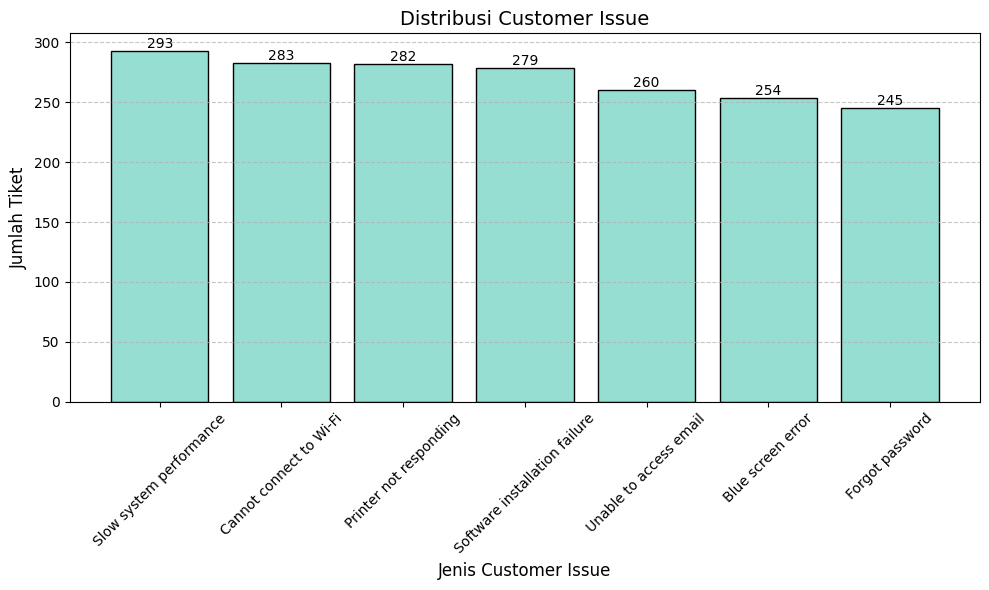

In [21]:
# Visualisasi distribusi customer issue
'''
Pada script ini digunakan untuk melakukan visualisasi
distribusi customer issue.
'''
Issue_count = data['Customer_Issue'].value_counts()

plt.figure(figsize=(10, 6))
count_Status_pending_Bar = plt.bar(Issue_count.index, Issue_count.values, color='#96DED1', edgecolor='black')
for label_bar in count_Status_pending_Bar:
    Nilai_Bar = label_bar.get_height()
    plt.text(label_bar.get_x() + label_bar.get_width()/2, Nilai_Bar, int(Nilai_Bar), va='bottom', ha='center')

plt.title("Distribusi Customer Issue", fontsize=14)
plt.xlabel("Jenis Customer Issue", fontsize=12)
plt.ylabel("Jumlah Tiket", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight** Berikut diatas adalah visualisasi distribusi Customer Issue. Pada grafik barchart diatas menunjukkan jumlah tiket berdasarkan jenis customer issue yang dialami user. Dari visualisasi ini kita dapat melihat bahwa jenis customer issue "Slow System Performance" lebih sering dialami user terlihat dari jumlah tiket yang dibuat sebanyak 293 tiket yang dibuat oleh user.

## 4. Bagaimana rata - rata waktu untuk setiap category issue ?(Visualisasi)

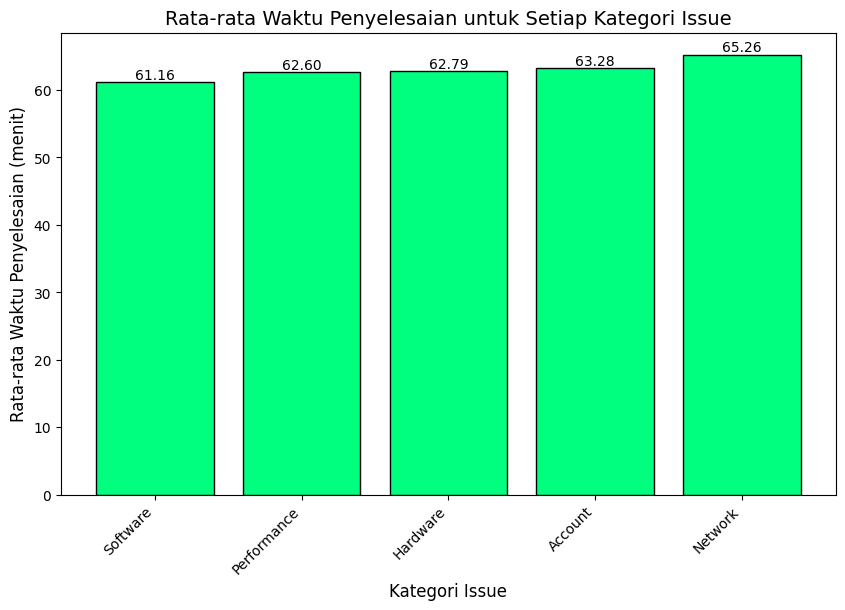

In [22]:
# menghitung categori issue
'''
Pada script ini digunakan untuk menghitung kategori issue
'''
Category_avg_Time = data.groupby('Issue_Category')['Resolution_Time'].mean().sort_values()

# Visualisasi rata-rata waktu setiap kategori issue
'''
Pada script ini digunakan untuk melakukan visualisasi
rata-rata waktu setiap kategori issue
'''
plt.figure(figsize=(10,6))
category_avg_time_bar = plt.bar(Category_avg_Time.index, Category_avg_Time.values, color='#00FF7F', edgecolor='black')

# Menambahkan nilai pada setiap bar
for label_bar in category_avg_time_bar:
    Nilai_Bar = label_bar.get_height()
    plt.text(label_bar.get_x() + label_bar.get_width()/2, Nilai_Bar, f"{Nilai_Bar:.2f}", va='bottom', ha='center')

plt.title('Rata-rata Waktu Penyelesaian untuk Setiap Kategori Issue', fontsize=14)
plt.xlabel('Kategori Issue', fontsize=12)
plt.ylabel('Rata-rata Waktu Penyelesaian (menit)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

**Insight** Berikut data visualisasi rata - rata waktu penyelesaian di setiap category issue. Pada grafik di atas menunjukan berapa waktu yang dibutuhkan untuk menyelesaikan tiket berdasarkan kategori issue yang ada. Jika kita melihat hasil dari visualisasi di atas kita dapat melihat kategori issue network yang memiliki waktu penyelesaian yang lebih lama yaitu 65 menit.

## 5. Bagaimana distribusi setiap issue status ?(Visualisasi)

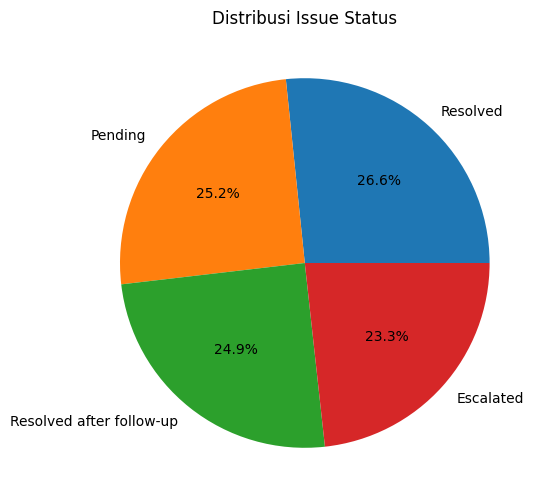

In [23]:
# Hitung distribusi
'''
Pada script ini digunakan untuk menghitung distribusi issue status
'''
Count_Status = data['Issue_Status'].value_counts()

# Visualisasi distribusi issue status
'''
Pada script ini digunakan untuk melakukan visualisasi distribusi issue status
'''
fig,ax1 = plt.subplots(figsize=(6,6))
Count_Status.plot(kind='pie', autopct='%.1f%%',ax=ax1)
plt.title('Distribusi Issue Status')
plt.ylabel('')
plt.show()

**Insight :** Berikut visualisasi data distribusi *Issue Status* bentuk visualisasi saya buat agar dapat mudah untuk dibaca. Pada diagram diatas kita dapat melihat proporsi *Issue Status* pada setiap tiket yang dibuat user, pada chart diatas kita dapat menyimpulkan bahwa persentase status tiket yang pending dan status tiket yang resolved hanya selisih 1.8%.

## 6. Untuk setiap status pending yang ada bagaimana distribusi issue category yang ada ?(Visualisasi)

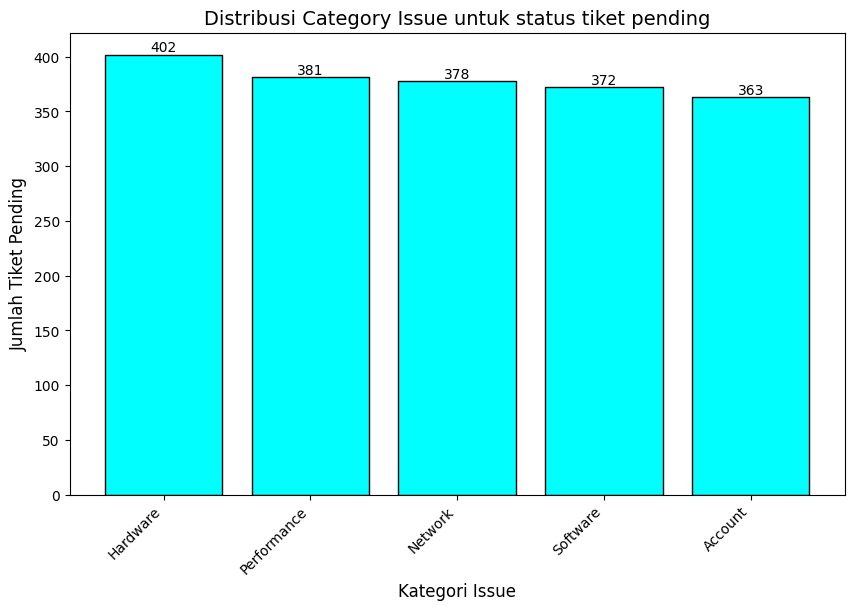

In [24]:
pending_category_counts = data['Issue_Category'].value_counts()

plt.figure(figsize=(10,6))
count_Status_pending = plt.bar(pending_category_counts.index, pending_category_counts.values, color='#00FFFF', edgecolor='black')

for label_bar in count_Status_pending:
    Nilai_Bar = label_bar.get_height()
    plt.text(label_bar.get_x() + label_bar.get_width()/2, Nilai_Bar, int(Nilai_Bar), va='bottom', ha='center')

plt.title('Distribusi Category Issue untuk status tiket pending', fontsize=14)
plt.xlabel('Kategori Issue', fontsize=12)
plt.ylabel('Jumlah Tiket Pending', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight :** Berikut data distribusi *Category Issue* saya buat dalam bentuk visualisasi agar dapat mudah dibaca. Dalam chart di atas dapat di lihat bahwa jumlah tiket pending terbanyak pada *Category Issue* adalah case Hardware yaitu sebanyak 402 tiket yang berstatus pending.

# Kesimpulan 

Dari analisis yang telah saya lakukan terhadap dataset diatas adalah analisis statistik waktu rata - rata untuk menyelesaikan tiket adalah 63 menit, dan tidak ada hubungan yang kuat antara Issue_Category dan Issue_Status. Pada visualisasi data distribusi Issue_Customer masalah yang paling sering dialami user, yaitu *Slow System Performance* dengan 293 tiket yang ada pada dataset. Selain itu, pada kategori masalah jaringan memiliki waktu penyelesaian yang paling lama, yaitu 65 menit. dari distribusi tiket, ditemukan bahwa terdapat selisih antara tiket yang berstatus pending dan yang telah resolved hanya 1.8%. Dan yang terakhir kategori hardware yang memiliki jumlah tiket pending terbanyak, yaitu sebanyak 402 tiket.

Kesimpulannya meskipun tidak adanya hubungan yang signifikan antara kategori masalah dan status tiket, beberapa kategory tertentu menunjukkan waktu penyelesaian lebih lama dan jumlah tiket yang berstatus pending lebih tinggi, yang dapat menjadi perhatian untuk perbaikan sistem atau membuat SOP yang lebih ketat lagi untuk Tim IT Ssupport.